## Linear model and regularization

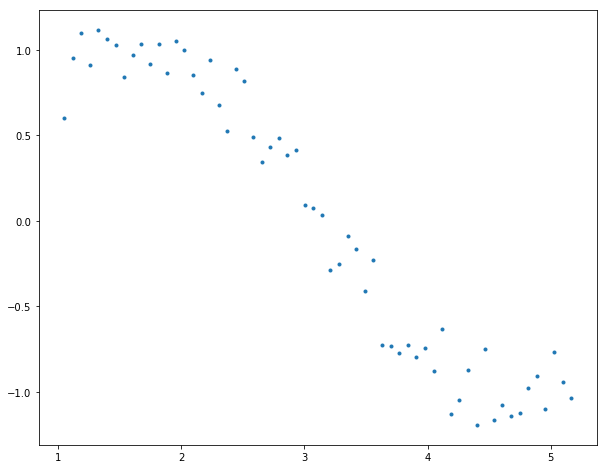

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

# define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(100)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))

data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

In [2]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,0.603561,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,0.950196,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,1.100139,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,0.913191,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,1.117494,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


# 0. Function definition

In [3]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [4]:
def example_regression(data, power, plot_dict, reg_type, alpha = 0):
    # define estimator object
    type_dict = {'Linear':LinearRegression(normalize=True),
                 'Lasso':Lasso(alpha = alpha, normalize=True),
                 'Ridge':Ridge(alpha = alpha, normalize=True)}
    
    # generate X in order
    X = ['x']
    if power >=2:
        X.extend(['x_%d'%i for i in range(2,power+1)])
    
    # fit the model
    if reg_type in type_dict:
        model = type_dict[reg_type]
    model.fit(data[X],data['y'])
    y_pred = model.predict(data[X])
    
    # check if a plot is to be made for the entered power
    if power in plot_dict:
        plt.subplot(plot_dict[power])
        plt.tight_layout()
        plt.plot(data['x'],data['y'],'.')
        plt.plot(data['x'],y_pred)
        plt.title('Plot for power: %d'%power)
    
    # return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([model.intercept_])
    ret.extend(model.coef_)
    return ret

# 1. Linear Regression 

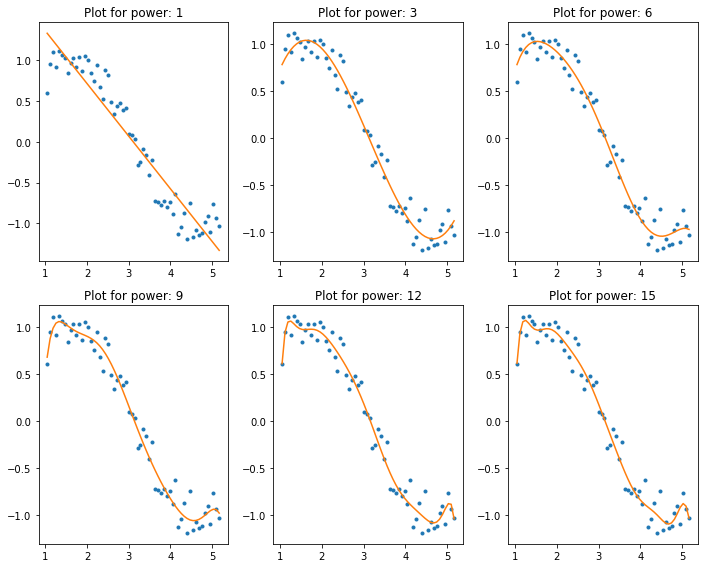

In [5]:
# initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['pow_%d'%i for i in range(1,16)]

perf_Linear = pd.DataFrame(index=ind, columns=col)

# define the powers for which a plot is required: {power:where}
plot_dict = {1:231,3:232,6:233,9:234,12:235,15:236}

# iterate through all powers and assimilate results
for i in range(1,16):
    perf_Linear.iloc[i-1,0:i+2] = example_regression(data, power=i, plot_dict=plot_dict,reg_type='Linear')

In [6]:
pd.options.display.float_format = '{:,.2g}'.format
perf_Linear

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
pow_1,3.7,2,-0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_2,3.7,1.9,-0.54,-0.017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_3,1.1,-1.4,3.4,-1.4,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_4,1.1,-1.1,2.9,-1.1,0.087,0.0051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_5,1,0.7,-0.86,1.8,-0.97,0.18,-0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_6,1,-6.1,16,-15,7.4,-2,0.28,-0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_7,0.98,-19,54,-61,36,-13,2.5,-0.26,0.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_8,0.94,-66,2.1e+02,-2.9e+02,2.1e+02,-93,26,-4.2,0.39,-0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_9,0.94,-70,2.3e+02,-3.1e+02,2.4e+02,-1.1e+02,31,-5.5,0.57,-0.03,0.00054,NaN,NaN,NaN,NaN,NaN,NaN
pow_10,0.88,-4.6e+02,1.9e+03,-3.4e+03,3.5e+03,-2.3e+03,9.9e+02,-2.9e+02,57,-7.3,0.53,-0.017,NaN,NaN,NaN,NaN,NaN


# 2. Lasso Regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


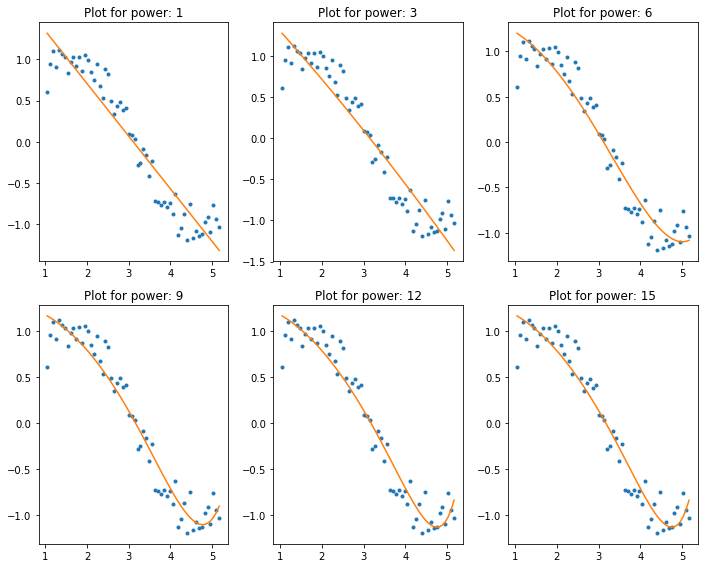

In [7]:
# initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['pow_%d'%i for i in range(1,16)]

perf_Lasso = pd.DataFrame(index=ind, columns=col)

# define the powers for which a plot is required: {power:where}
plot_dict = {1:231,3:232,6:233,9:234,12:235,15:236}

# iterate through all powers and assimilate results
for i in range(1,16):
    perf_Lasso.iloc[i-1,0:i+2] = example_regression(data, power=i, plot_dict = plot_dict, reg_type='Lasso', alpha = 1e-3)

In [8]:
pd.options.display.float_format = '{:,.2g}'.format
perf_Lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
pow_1,3.7,2,-0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_2,3.7,1.9,-0.54,-0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_3,3.7,1.9,-0.54,-0.016,-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_4,3.1,1.5,-0.2,-0.11,-0,0.0015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_5,2.4,1.4,-0,-0.15,-0,0,0.00042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_6,2.2,1.4,-0,-0.15,-0,-0,0,7.8e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_7,2,1.3,-0,-0.13,-0.0025,-0,-0,0,1.6e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_8,1.9,1.3,-0,-0.12,-0.0043,-0,-0,0,0,3.1e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_9,1.8,1.3,-0,-0.12,-0.0044,-0,-0,0,0,0,5.9e-07,NaN,NaN,NaN,NaN,NaN,NaN
pow_10,1.9,1.3,-0,-0.12,-0.0025,-0,-0,0,0,0,0,1.1e-07,NaN,NaN,NaN,NaN,NaN


# 3. Ridge Regression 

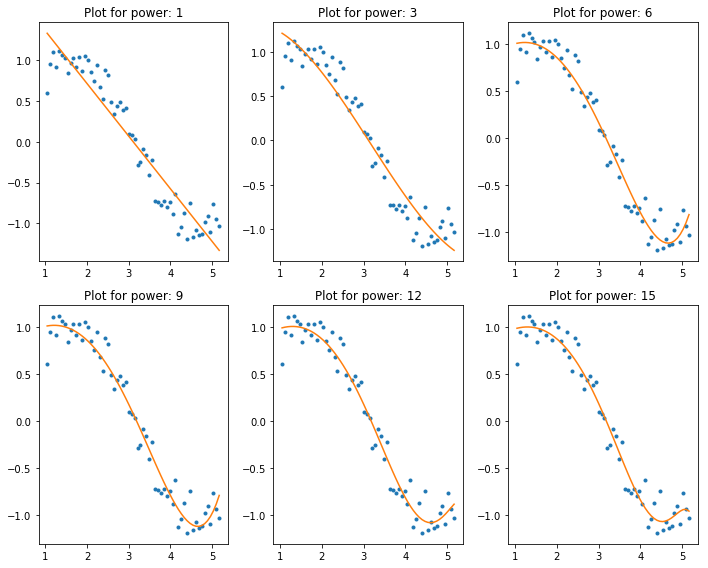

In [9]:
# Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['pow_%d'%i for i in range(1,16)]

perf_Ridge = pd.DataFrame(index=ind, columns=col)

# Define the powers for which a plot is required: {power:where}
plot_dict = {1:231,3:232,6:233,9:234,12:235,15:236}

# Iterate through all powers and assimilate results
for i in range(1,16):
    perf_Ridge.iloc[i-1,0:i+2] = example_regression(data, power=i, plot_dict = plot_dict, reg_type='Ridge', alpha = 1e-3)

In [10]:
pd.options.display.float_format = '{:,.2g}'.format
perf_Ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
pow_1,3.7,2,-0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_2,3.7,1.8,-0.53,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_3,2.7,1.3,0.24,-0.31,0.032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_4,1.6,0.71,0.68,-0.28,-0.03,0.0091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_5,1.3,0.61,0.63,-0.19,-0.034,-0.00049,0.0015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_6,1.3,0.68,0.5,-0.15,-0.028,-0.002,0.0004,0.00019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_7,1.3,0.73,0.44,-0.14,-0.025,-0.0018,0.00022,0.0001,1.8e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_8,1.3,0.74,0.43,-0.14,-0.024,-0.0018,0.00022,9.9e-05,1.7e-05,3.3e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_9,1.3,0.72,0.45,-0.14,-0.025,-0.002,0.00019,0.0001,2.1e-05,2e-06,-4.2e-07,NaN,NaN,NaN,NaN,NaN,NaN
pow_10,1.2,0.69,0.47,-0.13,-0.026,-0.0024,0.00012,0.0001,2.4e-05,3.6e-06,1.3e-07,-1.4e-07,NaN,NaN,NaN,NaN,NaN


In [14]:
perf_Linear.iloc[3]

rss            1.1
intercept     -1.1
coef_x_1       2.9
coef_x_2      -1.1
coef_x_3     0.087
coef_x_4    0.0051
coef_x_5       NaN
coef_x_6       NaN
coef_x_7       NaN
coef_x_8       NaN
coef_x_9       NaN
coef_x_10      NaN
coef_x_11      NaN
coef_x_12      NaN
coef_x_13      NaN
coef_x_14      NaN
coef_x_15      NaN
Name: pow_4, dtype: object